In [1718]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [1719]:
# Cargar los archivos
df1 = pd.read_csv('car data.csv')
df2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df3 = pd.read_csv('Car details v3.csv')
df4 = pd.read_csv('car details v4.csv')

## Revisión individual de los archivos CSV

Antes de realizar cualquier análisis, se inspecciona el contenido de cada archivo cargado para observar la estructura, calidad de los datos y posibles diferencias entre ellos.

In [1721]:
print ('car data.csv')
df1.head()

car data.csv


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1722]:
print ('CAR DETAILS FROM CAR DEKHO.csv')
df2.head()

CAR DETAILS FROM CAR DEKHO.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [1723]:
print ('Car details v3.csv')
df3.head()

Car details v3.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


In [1724]:
print ('car details v4.csv')
df4.head()

car details v4.csv


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00


## 1. Análisis Exploratorio de Datos (EDA)

En esta sección se analiza la estructura de los datos, su distribución, relaciones entre variables y la existencia de posibles valores atípicos. Esto permite comprender mejor la información y tomar decisiones informadas para la limpieza y el modelado.

### 1.1 Revisión inicial del dataset
- Visualización de las primeras filas
- Nombres y tipos de columnas
- Identificación de datos faltantes

### 1.2 Estadísticas descriptivas
- Distribuciones
- Medias, máximos, mínimos

### 1.3 Relaciones entre variables
- Matriz de correlación
- Diagramas de dispersión

### 1.4 Detección de valores atípicos
- Visualización con boxplots

In [1726]:
# Ver filas y columnas de 'car data.csv'
print(f"El dataset 'car data.csv' (df1) tiene {df1.shape[0]} filas y {df1.shape[1]} columnas.")

El dataset 'car data.csv' (df1) tiene 301 filas y 9 columnas.


In [1727]:
print("Nombres de las columnas del dataset 'car data.csv':")
print(df1.columns.tolist())

Nombres de las columnas del dataset 'car data.csv':
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [1728]:
print("Información general del dataset 'car data.csv':")
df1.info()

Información general del dataset 'car data.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1729]:
print("Valores nulos por columna en 'car data.csv':")
print(df1.isnull().sum())

Valores nulos por columna en 'car data.csv':
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [1730]:
print("Estadísticas básicas de las columnas numéricas en 'car data.csv':")
pd.set_option('display.float_format', '{:,.2f}'.format)
df1.describe()

Estadísticas básicas de las columnas numéricas en 'car data.csv':


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,"2,013.63",4.66,7.63,"36,947.21",0.04
std,2.89,5.08,8.64,"38,886.88",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.90,1.20,"15,000.00",0.00
50%,"2,014.00",3.60,6.40,"32,000.00",0.00
75%,"2,016.00",6.00,9.90,"48,767.00",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


### Hallazgos en `car data.csv` (df1)

- El dataset tiene 301 registros y 9 columnas.
- No hay valores nulos.
- La mayoría de autos son entre los años 2010–2017.
- Se identificaron posibles outliers:
  - `Selling_Price` tiene valores desde 0.1 hasta 35.
  - `Kms_Driven` llega hasta 500,000 km.
- La mayoría de autos ha tenido un solo dueño (`Owner` = 0).

In [1732]:
# Ver filas y columnas de 'CAR DETAILS FROM CAR DEKHO.csv'
print(f"El dataset 'CAR DETAILS FROM CAR DEKHO.csv' (df2) tiene {df2.shape[0]} filas y {df2.shape[1]} columnas.")

El dataset 'CAR DETAILS FROM CAR DEKHO.csv' (df2) tiene 4340 filas y 8 columnas.


In [1733]:
print("Nombres de las columnas del dataset 'CAR DETAILS FROM CAR DEKHO.csv':")
print(df2.columns.tolist())

Nombres de las columnas del dataset 'CAR DETAILS FROM CAR DEKHO.csv':
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [1734]:
print("Información general del dataset 'CAR DETAILS FROM CAR DEKHO.csv':")
df2.info()

Información general del dataset 'CAR DETAILS FROM CAR DEKHO.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [1735]:
print("Valores nulos por columna en 'CAR DETAILS FROM CAR DEKHO.csv':")
print(df2.isnull().sum())

Valores nulos por columna en 'CAR DETAILS FROM CAR DEKHO.csv':
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [1736]:
print("Estadísticas básicas de las columnas numéricas en 'CAR DETAILS FROM CAR DEKHO.csv':")
pd.set_option('display.float_format', '{:,.2f}'.format)
df2.describe()

Estadísticas básicas de las columnas numéricas en 'CAR DETAILS FROM CAR DEKHO.csv':


,year,selling_price,km_driven
count,"4,340.00","4,340.00","4,340.00"
mean,"2,013.09","504,127.31","66,215.78"
std,4.22,"578,548.74","46,644.10"
min,"1,992.00","20,000.00",1.00
25%,"2,011.00","208,749.75","35,000.00"
50%,"2,014.00","350,000.00","60,000.00"
75%,"2,016.00","600,000.00","90,000.00"
max,"2,020.00","8,900,000.00","806,599.00"


Hallazgos en CAR DETAILS FROM CAR DEKHO.csv (df2)
1. **Tamaño del dataset**:
   - El dataset contiene **4,340 filas** y **8 columnas**.
   - Esto representa una buena cantidad de datos para construir un modelo predictivo sólido.
     
2. **Tipos de datos**:
   - Columnas numéricas: `year`, `selling_price`, `km_driven`.
   - Columnas categóricas: `name`, `fuel`, `seller_type`, `transmission`, `owner`.
   - La columna `owner`, aunque es categórica, está codificada como texto. Podría convertirse a formato numérico para el modelo.

3. **Valores nulos**:
   - No se encontraron valores nulos en ninguna columna, lo cual facilita el preprocesamiento.

4. **Estadísticas descriptivas**:
   - **Año (`year`)**:
     - Rango: 1992 - 2020.
     - Hay vehículos antiguos que podrían ser considerados outliers.
   - **Precio de venta (`selling_price`)**:
     - Rango: ₹20,000 a ₹8,900,000.
     - Existe una gran variabilidad que podría influir en la precisión del modelo.
   - **Kilometraje (`km_driven`)**:
     - Rango: 1 km a 806,599 km.
     - La media es de 66,215 km. Valores muy altos podrían ser atípicos.

5. **Posibles valores atípicos**:
   - Algunos autos tienen kilometrajes superiores a 800,000 km o precios extremadamente altos, lo que podría distorsionar el modelo si no se tratan adecuadamente.

6. **Escalas y comparaciones**:
   - A diferencia de otros datasets como `df1`, los valores monetarios aquí están expresados en rupias completas, no en lakhs. Esto debe tenerse en cuenta al comparar o unir datasets.

7. **Siguientes pasos sugeridos**:
   - Analizar la distribución de las variables categóricas.
   - Visualizar las relaciones entre `selling_price` y otras variables (numéricas y categóricas).
   - Tratar los outliers si afectan significativamente al modelo.

In [1738]:
# Ver filas y columnas de 'Car details v3.csv'
print(f"El dataset 'Car details v3.csv' (df3) tiene {df3.shape[0]} filas y {df3.shape[1]} columnas.")

El dataset 'Car details v3.csv' (df3) tiene 8128 filas y 13 columnas.


In [1739]:
print("Nombres de las columnas del dataset 'Car details v3.csv':")
print(df3.columns.tolist())

Nombres de las columnas del dataset 'Car details v3.csv':
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [1740]:
print("Información general del dataset 'Car details v3.csv':")
df3.info()

Información general del dataset 'Car details v3.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1741]:
print("Valores nulos por columna en 'Car details v3.csv':")
print(df3.isnull().sum())

Valores nulos por columna en 'Car details v3.csv':
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [1742]:
print("Estadísticas básicas de las columnas numéricas en 'Car details v3.csv':")
pd.set_option('display.float_format', '{:,.2f}'.format)
df3.describe()

Estadísticas básicas de las columnas numéricas en 'Car details v3.csv':


,year,selling_price,km_driven,seats
count,"8,128.00","8,128.00","8,128.00","7,907.00"
mean,"2,013.80","638,271.81","69,819.51",5.42
std,4.04,"806,253.40","56,550.55",0.96
min,"1,983.00","29,999.00",1.00,2.00
25%,"2,011.00","254,999.00","35,000.00",5.00
50%,"2,015.00","450,000.00","60,000.00",5.00
75%,"2,017.00","675,000.00","98,000.00",5.00
max,"2,020.00","10,000,000.00","2,360,457.00",14.00


## Hallazgos del dataset `Car details v3.csv`

### Información general

- El dataset contiene **8,128 registros** y **13 columnas**.
- Las columnas cubren aspectos técnicos y de venta de los vehículos, incluyendo:
  - `name`, `year`, `selling_price`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`, `mileage`, `engine`, `max_power`, `torque`, `seats`
- Tipos de datos:
  - 3 columnas numéricas (`int64`)
  - 1 columna numérica (`float64`) — `seats`
  - 9 columnas categóricas (`object`)

### Valores nulos detectados

- Varias columnas contienen valores nulos:
  - `mileage`, `engine`, `torque`: 221 valores nulos cada una
  - `max_power`: 215 valores nulos
  - `seats`: 221 valores nulos

### Estadísticas básicas (columnas numéricas)

- El precio (`selling_price`) tiene un rango amplio, sugiriendo la presencia de **outliers**.
- El kilometraje (`km_driven`) también presenta un valor máximo muy alto (más de 2 millones), que puede requerir validación.
- La mayoría de los autos tienen **5 asientos**, pero hay vehículos con más capacidad (hasta 14).

### Observaciones adicionales

- Este dataset es más detallado que otros, incluyendo variables como `mileage`, `engine`, `max_power`, y `torque`.
- La columna `seats` podría ser homóloga a `Seating Capacity` del dataset `v4`.
- La limpieza de datos será necesaria para trabajar con las columnas que presentan valores nulos o tienen formatos no estándar (`object` que deberían ser numéricos como `mileage`, `engine`, etc.).

In [1744]:
# Ver filas y columnas de 'Car details v4.csv'
print(f"El dataset 'Car details v4.csv' (df3) tiene {df4.shape[0]} filas y {df4.shape[1]} columnas.")

El dataset 'Car details v4.csv' (df3) tiene 2059 filas y 20 columnas.


In [1745]:
print("Nombres de las columnas del dataset 'Car details v4.csv':")
print(df4.columns.tolist())

Nombres de las columnas del dataset 'Car details v4.csv':
['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


In [1746]:
print("Información general del dataset 'Car details v4.csv':")
df4.info()

Información general del dataset 'Car details v4.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  L

In [1747]:
print("Valores nulos por columna en 'Car details v4.csv':")
print(df4.isnull().sum())

Valores nulos por columna en 'Car details v4.csv':
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [1748]:
print("Estadísticas básicas de las columnas numéricas en 'Car details v4.csv':")
pd.set_option('display.float_format', '{:,.2f}'.format)
df4.describe()

Estadísticas básicas de las columnas numéricas en 'Car details v4.csv':


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,"2,059.00","2,059.00","2,059.00","1,995.00","1,995.00","1,995.00","1,995.00","1,946.00"
mean,"1,702,991.70","2,016.43","54,224.71","4,280.86","1,767.99","1,591.74",5.31,52.00
std,"2,419,880.64",3.36,"57,361.72",442.46,135.27,136.07,0.82,15.11
min,"49,000.00","1,988.00",0.00,"3,099.00","1,475.00","1,165.00",2.00,15.00
25%,"484,999.00","2,014.00","29,000.00","3,985.00","1,695.00","1,485.00",5.00,41.25
50%,"825,000.00","2,017.00","50,000.00","4,370.00","1,770.00","1,545.00",5.00,50.00
75%,"1,925,000.00","2,019.00","72,000.00","4,629.00","1,831.50","1,675.00",5.00,60.00
max,"35,000,000.00","2,022.00","2,000,000.00","5,569.00","2,220.00","1,995.00",8.00,105.00


## Hallazgos del dataset `Car details v4.csv`

### Información general

- El dataset contiene **2,059 registros** y **20 columnas**.
- Las columnas incluyen características técnicas y comerciales de automóviles como:
  - Fabricante (`Make`)
  - Modelo (`Model`)
  - Precio (`Price`)
  - Año (`Year`)
  - Kilometraje (`Kilometer`)
  - Tipo de combustible, transmisión, ubicación, color, tipo de vendedor, entre otros.
- Tipos de datos:
  - 3 columnas de tipo `int64`
  - 5 columnas de tipo `float64`
  - 12 columnas de tipo `object`

### Valores nulos detectados

- Varias columnas contienen valores nulos:
  - `Engine`, `Max Power`, `Max Torque`: 80 valores nulos
  - `Drivetrain`: 136 valores nulos
  - `Length`, `Width`, `Height`, `Seating Capacity`: 64 valores nulos cada una
  - `Fuel Tank Capacity`: 113 valores nulos

### Estadísticas básicas (columnas numéricas)

- `Price` tiene un rango amplio, lo cual sugiere posibles **outliers** que podrían necesitar tratamiento posterior.
- `Kilometer` también presenta un máximo muy alto (2 millones), que podría representar errores o registros especiales.
- La mayoría de los autos tienen capacidad de **5 asientos**, pero hay casos de hasta **8 pasajeros**.

### Observaciones adicionales

- La columna `Seating Capacity` parece ser equivalente a `seats` en otros datasets.
- `Price` podría corresponder a `selling_price` o `present_price` de otros archivos, pero requiere revisión del contexto o metadatos del archivo.
- Algunas columnas tienen nombres con espacios (como `Fuel Type`, `Max Power`), lo cual puede dificultar la manipulación si no se renombran posteriormente.

In [1750]:
# Función para limpiar nombres de columnas
def limpiar_columnas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

# Aplicar a todos los datasets
df1 = limpiar_columnas(df1)
df2 = limpiar_columnas(df2)
df3 = limpiar_columnas(df3)
df4 = limpiar_columnas(df4)

# Renombrar columnas específicas para unificación
df1.rename(columns={
    'kms_driven': 'km_driven'
}, inplace=True)
df2.rename(columns={
    'name': 'car_name',
    'fuel': 'fuel_type',
}, inplace=True)
df3.rename(columns={
    'name': 'car_name',
    'fuel': 'fuel_type',
}, inplace=True)

df4.rename(columns={
    'seating_capacity': 'seats',
    'kilometer': 'km_driven',
    'price': 'selling_price'
}, inplace=True)

# Crear columna unificada car_name (opcional pero útil)
df4['car_name'] = (df4['make'] + ' ' + df4['model']).str.lower().str.strip()

In [1751]:
print("Columnas en df1:")
print(df1.columns.tolist())
print("\nColumnas en df2:")
print(df2.columns.tolist())
print("\nColumnas en df3:")
print(df3.columns.tolist())
print("\nColumnas en df4:")
print(df4.columns.tolist())

Columnas en df1:
['car_name', 'year', 'selling_price', 'present_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']

Columnas en df2:
['car_name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']

Columnas en df3:
['car_name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

Columnas en df4:
['make', 'model', 'selling_price', 'year', 'km_driven', 'fuel_type', 'transmission', 'location', 'color', 'owner', 'seller_type', 'engine', 'max_power', 'max_torque', 'drivetrain', 'length', 'width', 'height', 'seats', 'fuel_tank_capacity', 'car_name']


In [1752]:
# Función para extraer valores numéricos de columnas con unidades
def extraer_numeros(texto):
    if pd.isnull(texto):
        return np.nan
    texto = str(texto)  # Asegura que el valor sea una cadena
    num = ''.join([c for c in texto if c.isdigit() or c == '.'])
    try:
        return float(num)
    except:
        return np.nan

# Aplicar limpieza a las columnas con texto + unidades
df3['mileage'] = df3['mileage'].apply(extraer_numeros)
df3['engine'] = df3['engine'].apply(extraer_numeros)
df3['max_power'] = df3['max_power'].apply(extraer_numeros)

# Imputación de valores nulos
df3['mileage'] = df3['mileage'].fillna(df3['mileage'].median())
df3['engine'] = df3['engine'].fillna(df3['engine'].median())
df3['max_power'] = df3['max_power'].fillna(df3['max_power'].median())
df3['seats'] = df3['seats'].fillna(df3['seats'].mode()[0])

# Eliminación segura de columna torque
df3.drop(columns=['torque'], inplace=True, errors='ignore')

# Verificación final
print("Valores nulos restantes en df3 después de la limpieza:")
print(df3.isnull().sum())

Valores nulos restantes en df3 después de la limpieza:
car_name         0
year             0
selling_price    0
km_driven        0
fuel_type        0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [1753]:
# Función para extraer valores numéricos de columnas con unidades

def extraer_primer_numero(texto):
    if pd.isnull(texto):
        return np.nan
    match = re.search(r'\d+\.?\d*', str(texto))  # busca primer número decimal
    if match:
        return float(match.group())
    return np.nan

# Aplicar limpieza a max_power
df4['max_power'] = df4['max_power'].apply(extraer_primer_numero)

#eliminar celdas
df4.drop(columns=['max_torque'], inplace=True)

# Limpieza de columnas que contienen texto con unidades
df4['engine'] = df4['engine'].apply(extraer_numeros)

# Imputación de valores nulos
df4['engine'] = df4['engine'].fillna(df4['engine'].median())
df4['length'] = df4['length'].fillna(df4['length'].median())
df4['width'] = df4['width'].fillna(df4['width'].median())
df4['height'] = df4['height'].fillna(df4['height'].median())
df4['fuel_tank_capacity'] = df4['fuel_tank_capacity'].fillna(df4['fuel_tank_capacity'].median())
df4['max_power'] = df4['max_power'].fillna(df4['max_power'].median())
df4['seats'] = df4['seats'].fillna(df4['seats'].mode()[0])
df4['drivetrain'] = df4['drivetrain'].fillna(df4['drivetrain'].mode()[0])

# Verificación final de valores nulos
print("Valores nulos restantes en df4 después de la limpieza:")
print(df4.isnull().sum())






Valores nulos restantes en df4 después de la limpieza:
make                  0
model                 0
selling_price         0
year                  0
km_driven             0
fuel_type             0
transmission          0
location              0
color                 0
owner                 0
seller_type           0
engine                0
max_power             0
drivetrain            0
length                0
width                 0
height                0
seats                 0
fuel_tank_capacity    0
car_name              0
dtype: int64


In [1754]:
# Lista de columnas comunes que has alineado
columnas_comunes = ['car_name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission']

# Si df3 y df4 tienen columnas adicionales que quieras conservar, puedes agregarlas aquí
# Por ejemplo, si ya limpiaste estas columnas y quieres conservarlas:
columnas_extra_df3 = ['mileage', 'engine', 'seats']
columnas_extra_df4 = ['engine', 'seats', 'max_power', 'length', 'width', 'height', 'fuel_tank_capacity', 'drivetrain']

# Creamos las versiones alineadas
df1_alineado = df1[columnas_comunes]
df2_alineado = df2[columnas_comunes]
df3_alineado = df3[columnas_comunes + columnas_extra_df3]
df4_alineado = df4[columnas_comunes + columnas_extra_df4]

# Unificamos todos los dataframes
df_completo = pd.concat([df1_alineado, df2_alineado, df3_alineado, df4_alineado], ignore_index=True)

In [1755]:
df_completo.head() 

,car_name,year,selling_price,km_driven,fuel_type,seller_type,transmission,mileage,engine,seats,max_power,length,width,height,fuel_tank_capacity,drivetrain
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1756]:
# Convertir variables categóricas a variables dummies
df_completo = pd.get_dummies(df_completo, columns=['transmission', 'fuel_type', 'seller_type', 'drivetrain'], drop_first=True)

In [1757]:
print("validar campos nulos en df_completo")
df_completo.isnull().sum()

validar campos nulos en df_completo


car_name                            0
year                                0
selling_price                       0
km_driven                           0
mileage                          6700
engine                           4641
seats                            4641
max_power                       12769
length                          12769
width                           12769
height                          12769
fuel_tank_capacity              12769
transmission_Manual                 0
fuel_type_CNG + CNG                 0
fuel_type_Diesel                    0
fuel_type_Electric                  0
fuel_type_Hybrid                    0
fuel_type_LPG                       0
fuel_type_Petrol                    0
fuel_type_Petrol + CNG              0
fuel_type_Petrol + LPG              0
seller_type_Corporate               0
seller_type_Dealer                  0
seller_type_Individual              0
seller_type_Trustmark Dealer        0
drivetrain_FWD                      0
drivetrain_R

In [1758]:
# Imputación de columnas numéricas con la mediana
df_completo['mileage'] = df_completo['mileage'].fillna(df_completo['mileage'].median())
df_completo['engine'] = df_completo['engine'].fillna(df_completo['engine'].median())
df_completo['max_power'] = df_completo['max_power'].fillna(df_completo['max_power'].median())
df_completo['length'] = df_completo['length'].fillna(df_completo['length'].median())
df_completo['width'] = df_completo['width'].fillna(df_completo['width'].median())
df_completo['height'] = df_completo['height'].fillna(df_completo['height'].median())
df_completo['fuel_tank_capacity'] = df_completo['fuel_tank_capacity'].fillna(df_completo['fuel_tank_capacity'].median())

# Imputación de columnas categóricas con la moda
df_completo['seats'] = df_completo['seats'].fillna(df_completo['seats'].mode()[0])

# Verificación final de valores nulos
print("Valores nulos restantes en df_completo después de la imputación:")
print(df_completo.isnull().sum())

Valores nulos restantes en df_completo después de la imputación:
car_name                        0
year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
seats                           0
max_power                       0
length                          0
width                           0
height                          0
fuel_tank_capacity              0
transmission_Manual             0
fuel_type_CNG + CNG             0
fuel_type_Diesel                0
fuel_type_Electric              0
fuel_type_Hybrid                0
fuel_type_LPG                   0
fuel_type_Petrol                0
fuel_type_Petrol + CNG          0
fuel_type_Petrol + LPG          0
seller_type_Corporate           0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
drivetrain_FWD                  0
drivetrain_RWD                  0
dtype: int64


In [1759]:
# 1. Separar variables independientes (X) y dependiente (y)
X = df_completo.drop(columns=['selling_price', 'car_name'])  # car_name no ayuda al modelo
y = df_completo['selling_price']

# 2. OneHotEncoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 3. SelectKBest con prueba F (regresión)
selector = SelectKBest(score_func=f_regression, k='all')  # Probar con 'all' primero para ver todas
fit = selector.fit(X, y)

# Visualizamos las puntuaciones de SelectKBest
scores = pd.DataFrame({'Feature': X.columns, 'F-Score': fit.scores_})
scores = scores.sort_values(by='F-Score', ascending=False)

print("\nResultados de SelectKBest:")
print(scores.head(10))  # Las 10 más relevantes

# 4. RandomForest para importancia de características
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importancia = pd.DataFrame({'Feature': X.columns, 'Importancia': rf.feature_importances_})
importancia = importancia.sort_values(by='Importancia', ascending=False)


Resultados de SelectKBest:
                Feature   F-Score
5             max_power 10,056.27
10  transmission_Manual  6,020.39
3                engine  5,045.51
9    fuel_tank_capacity  3,949.42
7                 width  3,134.24
0                  year  2,257.02
6                length  2,069.33
24       drivetrain_RWD  1,477.85
1             km_driven    478.80
12     fuel_type_Diesel    440.67


In [1760]:
print("\nImportancia según RandomForest:")
print(importancia.head(10))


Importancia según RandomForest:
                Feature  Importancia
5             max_power         0.43
10  transmission_Manual         0.15
0                  year         0.13
3                engine         0.11
1             km_driven         0.05
9    fuel_tank_capacity         0.04
7                 width         0.02
6                length         0.01
8                height         0.01
2               mileage         0.01


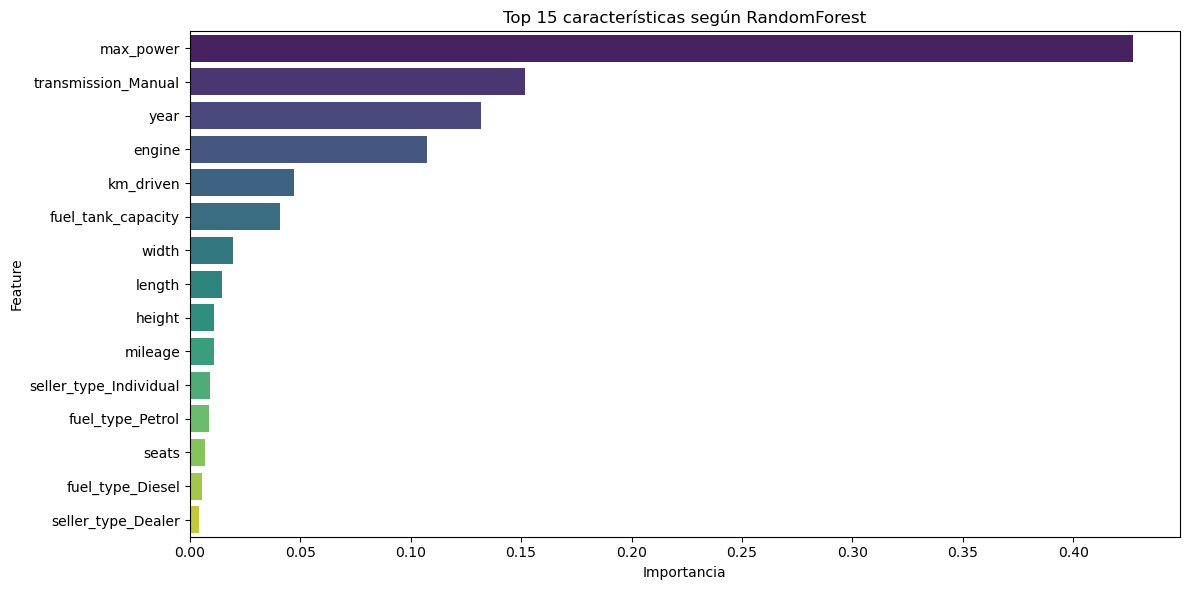

In [1761]:
# 5. Gráfica de importancia
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Feature', data=importancia.head(15), hue='Feature', palette='viridis', legend=False)
plt.title('Top 15 características según RandomForest')
plt.tight_layout()
plt.show()

In [1762]:
# Definir las características más importantes y la variable objetivo
caracteristicas = [
    'max_power',
    'transmission_Manual',
    'engine',
    'year',
    'km_driven',
    'fuel_tank_capacity',
    'width',
    'length'
]

objetivo = 'selling_price'

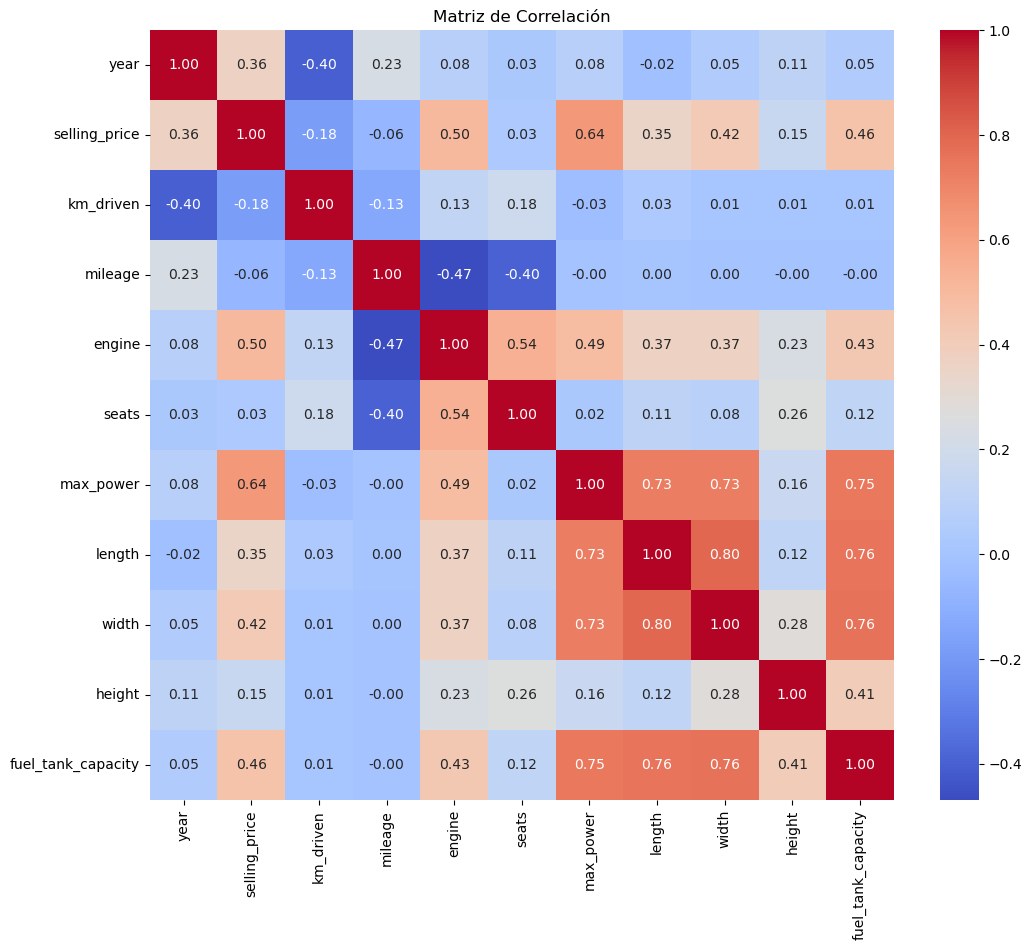

In [1763]:
# Solo seleccionamos columnas numéricas actuales del df_completo
numericas = df_completo.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación
corr_matrix = numericas.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [1821]:
# Dividir en entramiento y prueba
X = df_completo[caracteristicas]
y = df_completo[objetivo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1823]:
# Modelo Regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = modelo_lr.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

Regresión Lineal
MSE: 553187739615.365
R2 Score: 0.6408034847914967


In [1825]:
# Crear y entrenar el modelo Random Fosret
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar resultados
print("Random Forest Regressor")
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)

Random Forest Regressor
MSE: 155794116810.2754
R2 Score: 0.8988395804159592


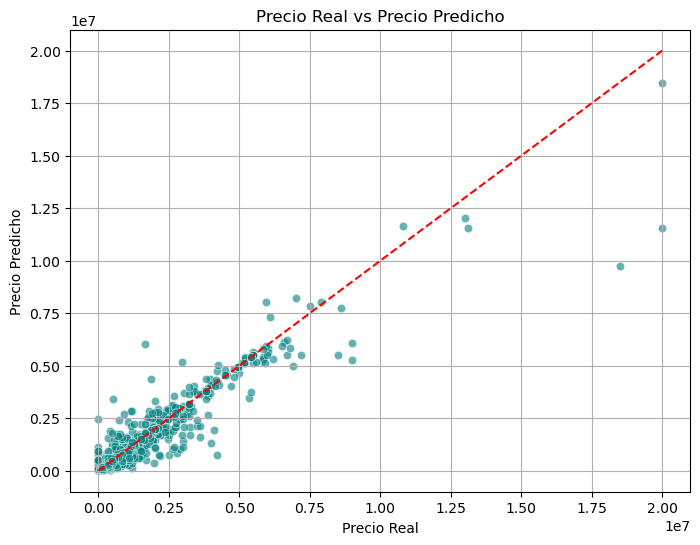

In [1833]:
# Predecir con el modelo
y_pred = rf_model.predict(X_test)

# Crear DataFrame para graficar
resultados = pd.DataFrame({'Precio Real': y_test, 'Precio Predicho': y_pred})

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resultados, x='Precio Real', y='Precio Predicho', color='teal', alpha=0.6)
plt.plot([resultados.min().min(), resultados.max().max()],
         [resultados.min().min(), resultados.max().max()],
         'r--')  # línea ideal
plt.title('Precio Real vs Precio Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid(True)
plt.show()

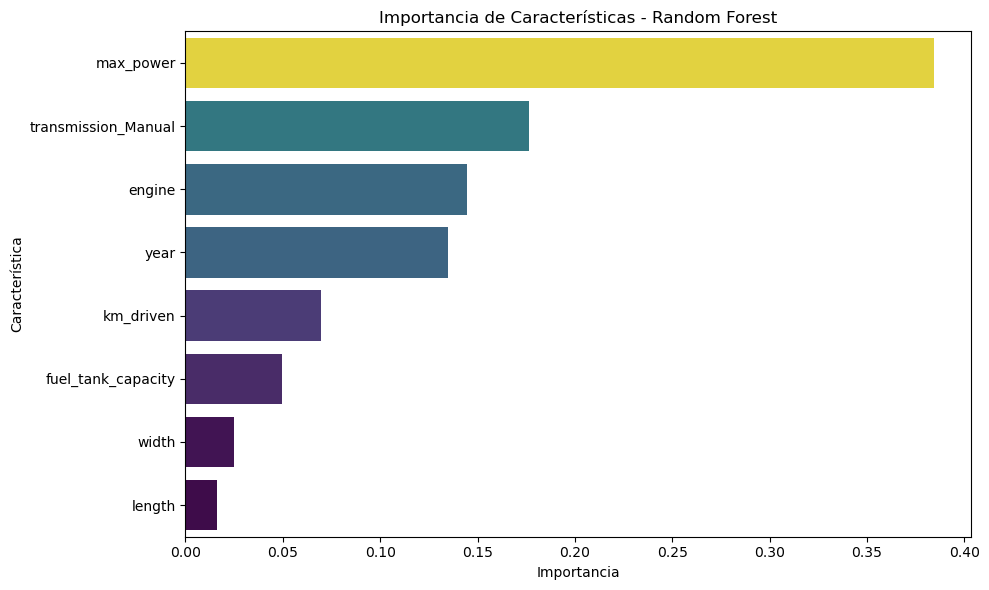

In [1841]:
# Importancias
importancias = rf_model.feature_importances_
caract_importancia = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=caract_importancia, x='Importancia', y='Característica', hue='Importancia', palette='viridis', legend=False)
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

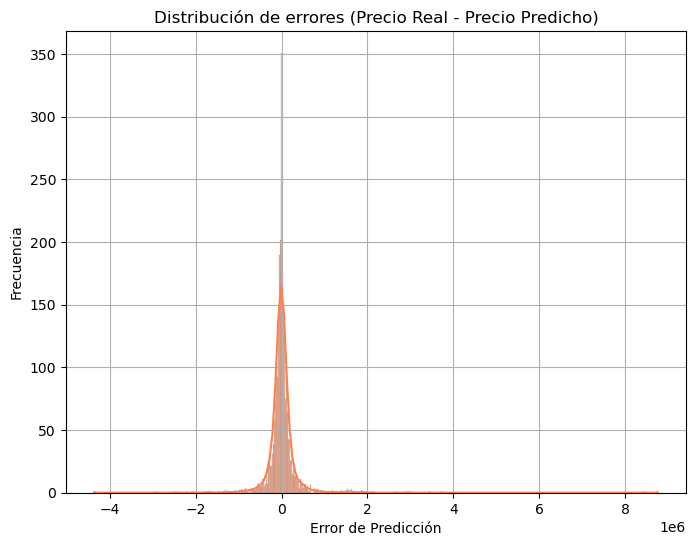

In [1843]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='coral')
plt.title('Distribución de errores (Precio Real - Precio Predicho)')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()